## Tubes Permodelan dan Simulasi

#### Nama Kelompok :
1. I Gede Arengga Nabakta   (1203220108)
2. Mahendra Pratama H.P.    (1203222078)
3. Daniswara Aryasatya F.F. (1203220066)

### Simulasi Monte Carlo untuk Memprediksi Persediaan Darah pada tahun 2017

Teknik pengolahan dengan simulasi  Monte Carlo 
untuk memprediksi persediaan  dilakukan dengan 
mempresentasikan masalah kedalam basis pengetahuan 
(knowledge base) dengan langkah langkah sebagai 
berikut: 

1. Membuat distribusi dari probabilitas;
2. Menghitung distribusi kemungkinan komulatif;
3. Membuat interval bilangan acak;
4. Melakukan simulasi dengan bilangan acak;
5. Menganalisa simulasi dari rangkaian percobaan.

### Hasil dan Pembahasan

Data persediaan darah pada tahun 2016 akan digunakan untuk mempredksi jumlah persediaan darah di tahun 2017.

#### langkah pertama adalah install pint dan import modsim

In [22]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

In [23]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Berikut adalah Library yang digunakan.
<ul>
<li>pandas, digunakan untuk mencatat data menggunakan dataframe, pembaca dan penulisan data.
<li>numpy, digunakan untuk Operasi matematis.
<li>modsim, digunakan untuk permodelan dan simulasi.
<li>sklearn.metrics adalah modul dalam Scikit-learn (scikit-learn atau sklearn) yang menyediakan berbagai alat untuk mengevaluasi kinerja model 
<ul>

In [24]:
import pandas as pd
import numpy as np
from modsim import *
from sklearn.metrics import mean_squared_error

#### Langkah kedua adalah memasukan data tiap bulan <br>
data disimpan menggunakan object `State`

In [25]:
data_permintaan_2016 = State(januari=14251, februari=12542, maret=13852, april=13414, mei=12674, juni=14903, juli=12450, agustus=13076, september=12677, oktober=13554, november=12779, desember=13722)
data_permintaan_2017 = State(januari=14881, februari=13431, maret=12285, april=14412, mei=13256, juni=10368, juli=13290, agustus=13399, september=12384, oktober=13248, november=12425, desember=13038)

data_permintaan_2016

januari      14251
februari     12542
maret        13852
april        13414
mei          12674
juni         14903
juli         12450
agustus      13076
september    12677
oktober      13554
november     12779
desember     13722
Name: state, dtype: int64

#### Probabilitas tiap bulan 
Langkah pertama yaitu  menentukan distribusi probabilitas dari variabel menggunakan rumus : <br>

`A = M / I`<br>

A = Probabilitas,<br>
M = Frekuensi,<br>
I = Jumlah<br>


In [26]:
total_per_bulan = data_permintaan_2016.sum()

probalitas = data_permintaan_2016 / total_per_bulan

probalitas

januari      0.089128
februari     0.078439
maret        0.086632
april        0.083893
mei          0.079265
juni         0.093205
juli         0.077864
agustus      0.081779
september    0.079284
oktober      0.084769
november     0.079922
desember     0.085819
Name: state, dtype: float64

Text(0.5, 1.0, 'Probabilitas Ketersediaan Per Bulan 2016')

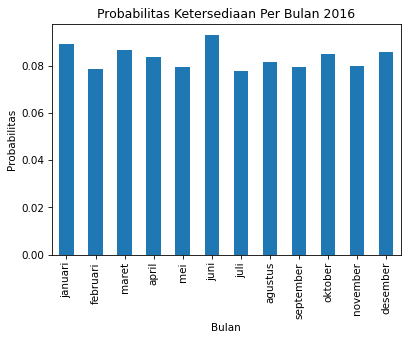

In [27]:
#membuat series dari data
probabilitas_series = pd.Series(probalitas)

#Plotting
fig, ax = plt.subplots()
probabilitas_series.plot(kind='bar', ax=ax)
ax.set_xlabel('Bulan')
ax.set_ylabel('Probabilitas')
ax.set_title('Probabilitas Ketersediaan Per Bulan 2016')



Menetapkan Distribusi Probabilitas Komulatif Nilai probabilitas komulatif didapatkan dari perhitungan  hasil    nilai  distribusi  probabilitas  dengan jumlah nilai distribusi probabilitas sebelumnya.<br>

diberikan juga object system yang memiliki variable seperti 
<ul>
    <li>bulan
    <li>distribusi probabilitas
    <li>distribusi nilai acak
    <li>batas atas distribusi
    <li>batas bawah distribusi
    <li>pembangkit nilai acak
    <li>hasil
<ul>


Distribusi Probabilitas Kumulatif 2016: [0.08912779716562222, 0.16756726331194416, 0.2541996572729433, 0.33809273643789006, 0.4173577495090497, 0.5105632481519006, 0.5884273331081841, 0.6702065118140768, 0.7494902873153464, 0.8342589465520908, 0.9141806446770986, 1.0]


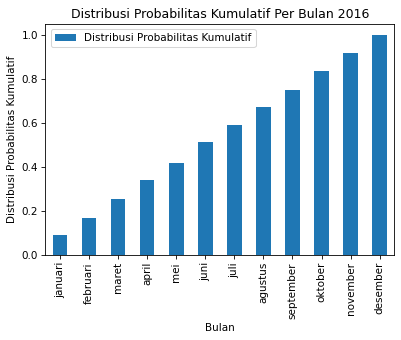

In [28]:
system = System(
    bulan=['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember'],
    distribusi_probabilitas_kumulatif=[0] * 12,
    distribusi_100=[0] * 12,
    batas_bawah=[0] * 12,
    batas_atas=[0] * 12,
    random_numbers=[] * 12,
    hasil=[] * 12
)

distribusi_kumulatif = 0
for i, month in enumerate(system.bulan):
    distribusi_kumulatif += probabilitas_series[month]
    system.distribusi_probabilitas_kumulatif[i] = distribusi_kumulatif

print("Distribusi Probabilitas Kumulatif 2016:", system.distribusi_probabilitas_kumulatif)

# Membuat DataFrame untuk keperluan plotting
df = pd.DataFrame({
    'Bulan': system.bulan,
    'Distribusi Probabilitas Kumulatif': system.distribusi_probabilitas_kumulatif
})

# Plotting
fig, ax = plt.subplots()
df.set_index('Bulan').plot(kind='bar', ax=ax)

# Menambahkan label dan judul
ax.set_xlabel('Bulan')
ax.set_ylabel('Distribusi Probabilitas Kumulatif')
ax.set_title('Distribusi Probabilitas Kumulatif Per Bulan 2016')

# Menampilkan plot
plt.show()

#### Menetapkan Interval Angka Random (Angka Acak)

In [29]:
# Mengonversi distribusi kumulatif ke rentang 0-100
for i in range(12):
    system.distribusi_100[i] = int(system.distribusi_probabilitas_kumulatif[i] * 100)

# Menghitung batas bawah dan batas atas
system.batas_bawah[0] = 0
system.batas_atas[0] = system.distribusi_100[0]

for i in range(1, 12):
    system.batas_bawah[i] = system.distribusi_100[i - 1] + 1
    system.batas_atas[i] = system.distribusi_100[i]

# Menampilkan hasil
for i, month in enumerate(system.bulan):
    print(f"Bulan {month.capitalize()}: Batas Bawah = {system.batas_bawah[i]}, Batas Atas = {system.batas_atas[i]}")


Bulan Januari: Batas Bawah = 0, Batas Atas = 8
Bulan Februari: Batas Bawah = 9, Batas Atas = 16
Bulan Maret: Batas Bawah = 17, Batas Atas = 25
Bulan April: Batas Bawah = 26, Batas Atas = 33
Bulan Mei: Batas Bawah = 34, Batas Atas = 41
Bulan Juni: Batas Bawah = 42, Batas Atas = 51
Bulan Juli: Batas Bawah = 52, Batas Atas = 58
Bulan Agustus: Batas Bawah = 59, Batas Atas = 67
Bulan September: Batas Bawah = 68, Batas Atas = 74
Bulan Oktober: Batas Bawah = 75, Batas Atas = 83
Bulan November: Batas Bawah = 84, Batas Atas = 91
Bulan Desember: Batas Bawah = 92, Batas Atas = 100


#### Membangkitkan Angka Acak

Membangkitkan angka acak untuk data persediaan 
darah  tahun 2017 yang dibuat berdasarkan rumus :  
 `Ri = (dRi-1 + O) mod m`

In [30]:
def generate_random_numbers(system):
    system.random_numbers = [system.seed]
    for i in range(1, system.n):
        new_random_number = (system.d * system.random_numbers[-1] + system.o) % system.m
        system.random_numbers.append(new_random_number)
    return system.random_numbers

seeders = System(
    seed=6,  # Nilai awal R
    d=5,     # Konstanta d
    o=13,    # Konstanta O
    m=99,    # Konstanta m
    n=12     # Jumlah nilai acak
)

random_numbers = generate_random_numbers(seeders)
print("Nilai-nilai acak 1 tahun:", random_numbers)

Nilai-nilai acak 1 tahun: [6, 43, 30, 64, 36, 94, 87, 52, 75, 91, 72, 76]


In [31]:
hasil = [None] * 12

def calculate(number):
    count = 0
    while number > system.batas_atas[count]:
        count +=1
    return data_permintaan_2016[count]
    
for i in range(12):
    hasil[i] = calculate(random_numbers[i])
    print(system.bulan[i],"\t:", hasil[i])
    
system.hasil = hasil
    

januari 	: 14251
februari 	: 14903
maret 	: 13414
april 	: 13076
mei 	: 12674
juni 	: 13722
juli 	: 12779
agustus 	: 12450
september 	: 13554
oktober 	: 12779
november 	: 12677
desember 	: 13554


C:\Users\areng\AppData\Local\Temp\ipykernel_27992\4079900892.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data_permintaan_2016[count]


#### Perbandingan dan Akurasi

mencari nilai akurasi dengan metode mape

In [32]:
data_asli = data_permintaan_2017
data_simulasi = system.hasil

# Fungsi untuk menghitung akurasi untuk setiap data
def calculate_accuracy(data_asli, data_simulasi):
    accuracies = []
    for i in range(len(data_asli)):
        mape = abs((data_asli[i] - data_simulasi[i]) / data_asli[i])
        accuracy = 100 - (mape * 100)
        accuracies.append(accuracy)
    return accuracies

accuracies = calculate_accuracy(data_asli, data_simulasi)

for i, acc in enumerate(accuracies):
    print(f"{system.bulan[i]} :\n \tprediksi : {data_simulasi[i]}, \n \tdata asli : {data_asli[i]}, \n \tTingkat akurasi : {acc:.2f}%")    




januari :
 	prediksi : 14251, 
 	data asli : 14881, 
 	Tingkat akurasi : 95.77%
februari :
 	prediksi : 14903, 
 	data asli : 13431, 
 	Tingkat akurasi : 89.04%
maret :
 	prediksi : 13414, 
 	data asli : 12285, 
 	Tingkat akurasi : 90.81%
april :
 	prediksi : 13076, 
 	data asli : 14412, 
 	Tingkat akurasi : 90.73%
mei :
 	prediksi : 12674, 
 	data asli : 13256, 
 	Tingkat akurasi : 95.61%
juni :
 	prediksi : 13722, 
 	data asli : 10368, 
 	Tingkat akurasi : 67.65%
juli :
 	prediksi : 12779, 
 	data asli : 13290, 
 	Tingkat akurasi : 96.16%
agustus :
 	prediksi : 12450, 
 	data asli : 13399, 
 	Tingkat akurasi : 92.92%
september :
 	prediksi : 13554, 
 	data asli : 12384, 
 	Tingkat akurasi : 90.55%
oktober :
 	prediksi : 12779, 
 	data asli : 13248, 
 	Tingkat akurasi : 96.46%
november :
 	prediksi : 12677, 
 	data asli : 12425, 
 	Tingkat akurasi : 97.97%
desember :
 	prediksi : 13554, 
 	data asli : 13038, 
 	Tingkat akurasi : 96.04%


C:\Users\areng\AppData\Local\Temp\ipykernel_27992\4076183850.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mape = abs((data_asli[i] - data_simulasi[i]) / data_asli[i])
C:\Users\areng\AppData\Local\Temp\ipykernel_27992\4076183850.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{system.bulan[i]} :\n \tprediksi : {data_simulasi[i]}, \n \tdata asli : {data_asli[i]}, \n \tTingkat akurasi : {acc:.2f}%")


akurasi keseluruhan

In [33]:
data_asli = data_permintaan_2017
data_simulasi_ketersediaan = system.hasil

# Fungsi untuk menghitung MAPE
def calculate_mape(data_asli, data_simulasi):
    n = len(data_asli)
    mape = 0
    for i in range(n):
        mape += abs((data_asli[i] - data_simulasi[i]) / data_asli[i])
    mape = (mape / n) * 100
    return mape

# Hitung MAPE
mape = calculate_mape(data_asli, data_simulasi)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Hitung akurasi
akurasi = 100 - mape
print(f"Persentase Akurasi: {akurasi:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.36%
Persentase Akurasi: 91.64%


C:\Users\areng\AppData\Local\Temp\ipykernel_27992\2503875818.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mape += abs((data_asli[i] - data_simulasi[i]) / data_asli[i])


### Berikut adalah Garfik Final

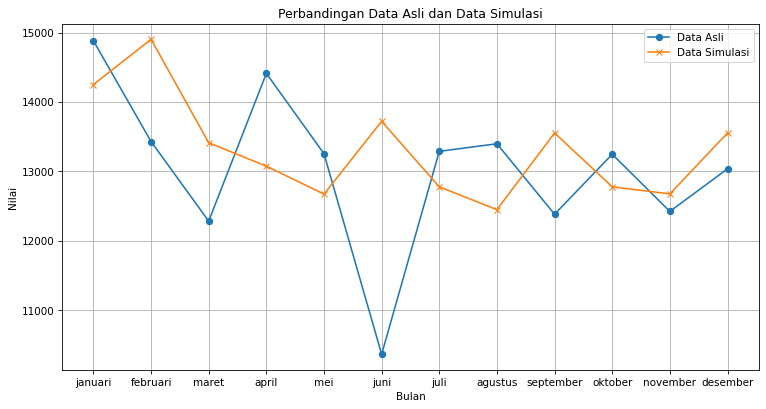

In [34]:
# Create a TimeSeries for original and simulated data
original_series = TimeSeries(data_asli, index=system.bulan)
simulated_series = TimeSeries(data_simulasi, index=system.bulan)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(original_series, label='Data Asli', marker='o')
plt.plot(simulated_series, label='Data Simulasi', marker='x')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Perbandingan Data Asli dan Data Simulasi')
plt.legend()
plt.grid(True)
plt.show()

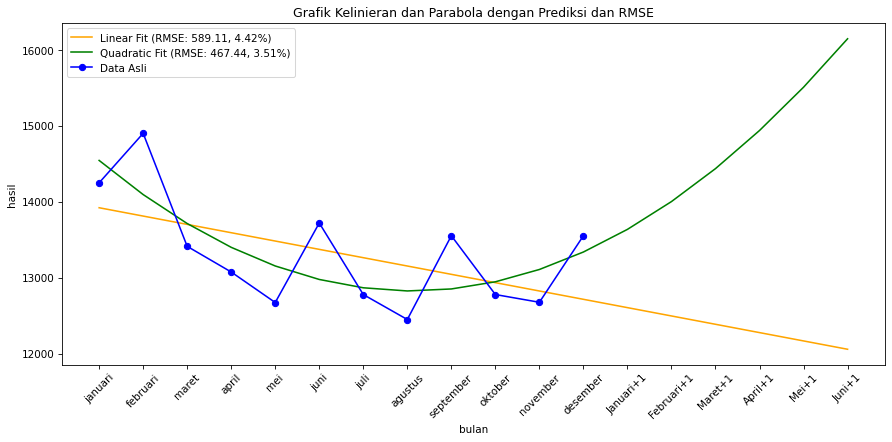

Kesimpulan akhir :
	Mean Eror Quad: 3.51%
	Mean Eror Linear: 4.42%
	Akurasi total: 91.64%


In [47]:
# Membuat angka system.bulan untuk sumbu x
x = np.arange(len(system.bulan))

# Membuat prediksi untuk 6 system.bulan ke depan
prediksi = system.bulan + ['Januari+1', 'Februari+1', 'Maret+1', 'April+1', 'Mei+1', 'Juni+1']
x_prediksi = np.arange(len(prediksi))

# Membuat grafik
plt.figure(figsize=(12, 6))

# Grafik kelinieran (linear)
coef_linear = np.polyfit(x, system.hasil, 1)
poly1d_linear = np.poly1d(coef_linear)
linear_pred = poly1d_linear(x)

# Menghitung error linear
mse_linear = mean_squared_error(system.hasil, linear_pred)
rmse_linear = np.sqrt(mse_linear)

# Menghitung RMSE dalam persen
average_hasil = np.mean(system.hasil)
rmse_linear_percent = (rmse_linear / average_hasil) * 100

plt.plot(prediksi, poly1d_linear(x_prediksi), label=f'Linear Fit (RMSE: {rmse_linear:.2f}, {rmse_linear_percent:.2f}%)', color='orange')

# Grafik parabola (quadratic)
coef_quad = np.polyfit(x, system.hasil, 2)
poly1d_quad = np.poly1d(coef_quad)
quad_pred = poly1d_quad(x)

# Menghitung error quadratic
mse_quad = mean_squared_error(system.hasil, quad_pred)
rmse_quad = np.sqrt(mse_quad)

# Menghitung RMSE dalam persen
rmse_quad_percent = (rmse_quad / average_hasil) * 100

plt.plot(prediksi, poly1d_quad(x_prediksi), label=f'Quadratic Fit (RMSE: {rmse_quad:.2f}, {rmse_quad_percent:.2f}%)', color='green')

# Grafik data asli
plt.plot(system.bulan, system.hasil, 'o-', label='Data Asli', color='blue')

# Menambahkan judul dan label
plt.title('Grafik Kelinieran dan Parabola dengan Prediksi dan RMSE')
plt.xlabel('bulan')
plt.ylabel('hasil')
plt.xticks(rotation=45)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


print(f"Kesimpulan akhir :\n\tMean Eror Quad: {rmse_quad_percent:.2f}%")
print(f"\tMean Eror Linear: {rmse_linear_percent:.2f}%")
print(f"\tAkurasi total: {akurasi:.2f}%")